In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Analyze the dataset using straightforward functions.

In [2]:
?diamonds

diamonds {ggplot2},R Documentation


In [3]:
glimpse(diamonds)

Rows: 53,940
Columns: 10
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.…
$ cut     <ord> Ideal, Premium, Good, Premium, Good, Very Good, Very Good, Ver…
$ color   <ord> E, E, E, I, J, J, I, H, E, H, J, J, F, J, E, E, I, J, J, J, I,…
$ clarity <ord> SI2, SI1, VS1, VS2, SI2, VVS2, VVS1, SI1, VS2, VS1, SI1, VS1, …
$ depth   <dbl> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64…
$ table   <dbl> 55, 61, 65, 58, 58, 57, 57, 55, 61, 61, 55, 56, 61, 54, 62, 58…
$ price   <int> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340, 34…
$ x       <dbl> 3.95, 3.89, 4.05, 4.20, 4.34, 3.94, 3.95, 4.07, 3.87, 4.00, 4.…
$ y       <dbl> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05, 4.…
$ z       <dbl> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39, 2.…


In [4]:
summary(diamonds)

carat cut color clarity depth 
 Min. :0.2000 Fair : 1610 D: 6775 SI1 :13065 Min. :43.00 
 1st Qu.:0.4000 Good : 4906 E: 9797 VS2 :12258 1st Qu.:61.00 
 Median :0.7000 Very Good:12082 F: 9542 SI2 : 9194 Median :61.80 
 Mean :0.7979 Premium :13791 G:11292 VS1 : 8171 Mean :61.75 
 3rd Qu.:1.0400 Ideal :21551 H: 8304 VVS2 : 5066 3rd Qu.:62.50 
 Max. :5.0100 I: 5422 VVS1 : 3655 Max. :79.00 
 J: 2808 (Other): 2531 
 table price x y 
 Min. :43.00 Min. : 326 Min. : 0.000 Min. : 0.000 
 1st Qu.:56.00 1st Qu.: 950 1st Qu.: 4.710 1st Qu.: 4.720 
 Median :57.00 Median : 2401 Median : 5.700 Median : 5.710 
 Mean :57.46 Mean : 3933 Mean : 5.731 Mean : 5.735 
 3rd Qu.:59.00 3rd Qu.: 5324 3rd Qu.: 6.540 3rd Qu.: 6.540 
 Max. :95.00 Max. :18823 Max. :10.740 Max. :58.900 
 
 z 
 Min. : 0.000 
 1st Qu.: 2.910 
 Median : 3.530 
 Mean : 3.539 
 3rd Qu.: 4.040 
 Max. :31.800

# Chart to understand the dataset

## Utilize a histogram chart to gain insight into the distribution of diamond prices.

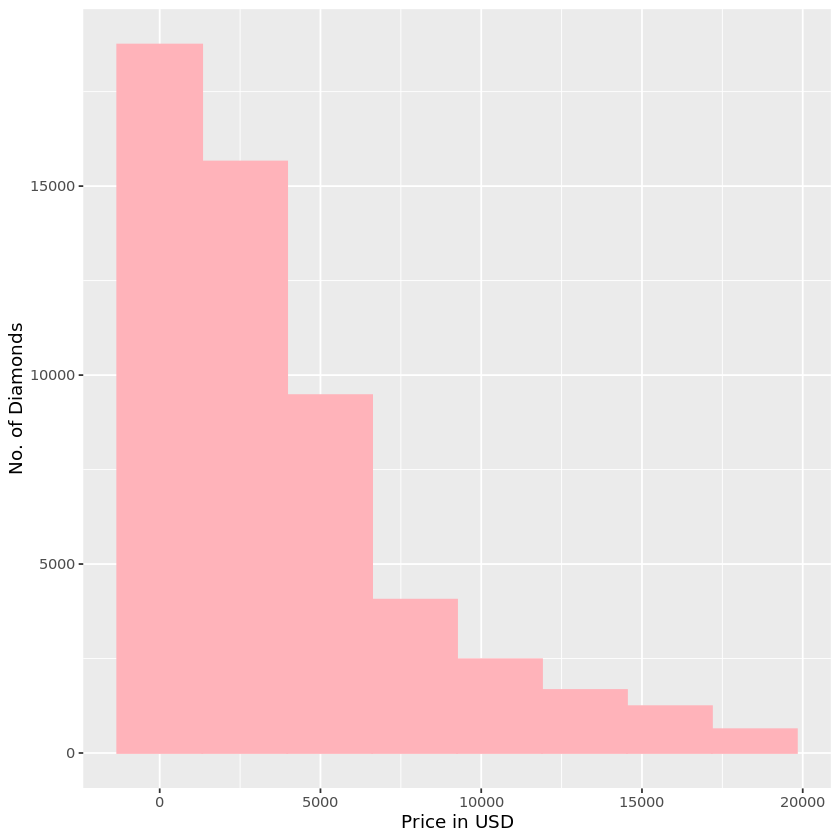

In [5]:
# Histogram
ggplot(diamonds, aes(price)) +
geom_histogram(bins = 8, fill = "#ffb3ba", col = "#ffb3ba") +
labs(
x = "Price in USD",
y = "No. of Diamonds")

Diamond prices in the market tend to be lower, with most diamonds selling for less than USD 5,000. High-priced diamonds are less common.

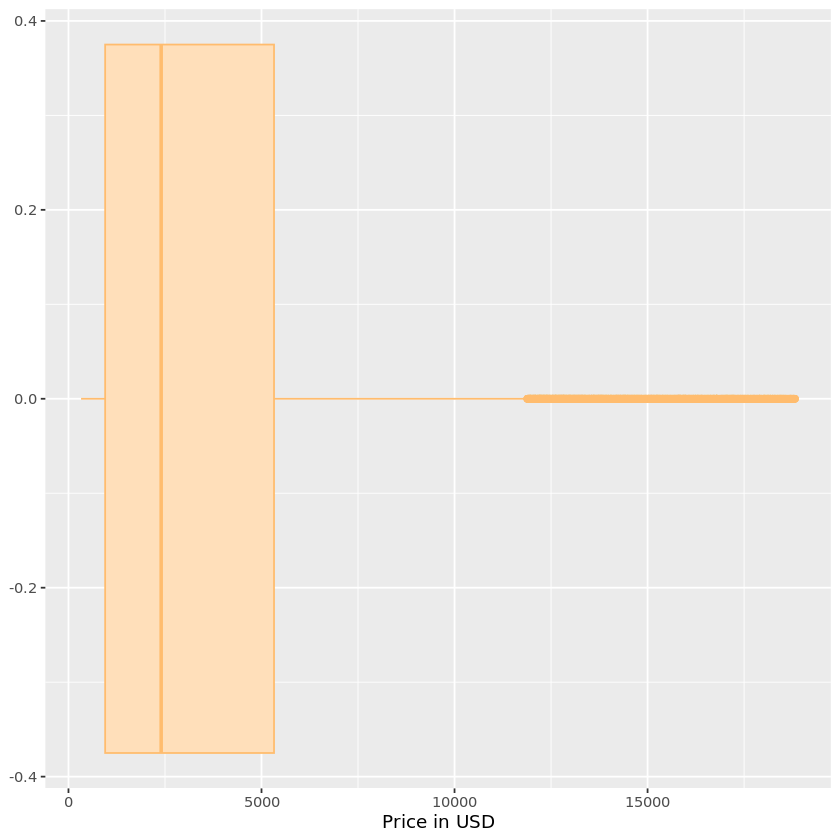

In [6]:
# Box Plot
ggplot(diamonds, aes(price)) +
geom_boxplot(fill = "#ffdfba", col = "#ffbc6e") +
labs(
x = "Price in USD")

You can use a box plot to highlight that the average price is below USD 2,500, and there are very few diamond prices exceeding USD 5,000 in sales.

##  Determine the relationships between the cut and price.

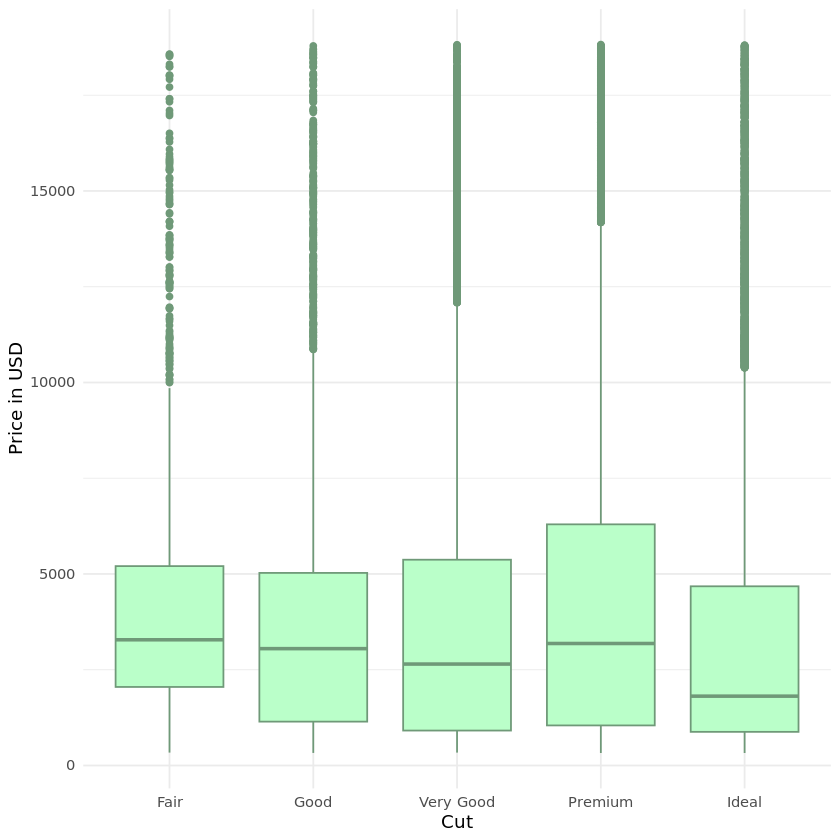

In [7]:
# Cut & Price
ggplot(diamonds, aes(cut, price)) +
geom_boxplot(fill = "#baffc9", col = "#6f9978") +
theme_minimal() +
labs(
x = "Cut",
y = "Price in USD")

The results indicate that the cut directly affects the price, with the 'Ideal' cut having the lowest mean price.

##  Create a bar chart illustrating the prices of diamonds for each color category.

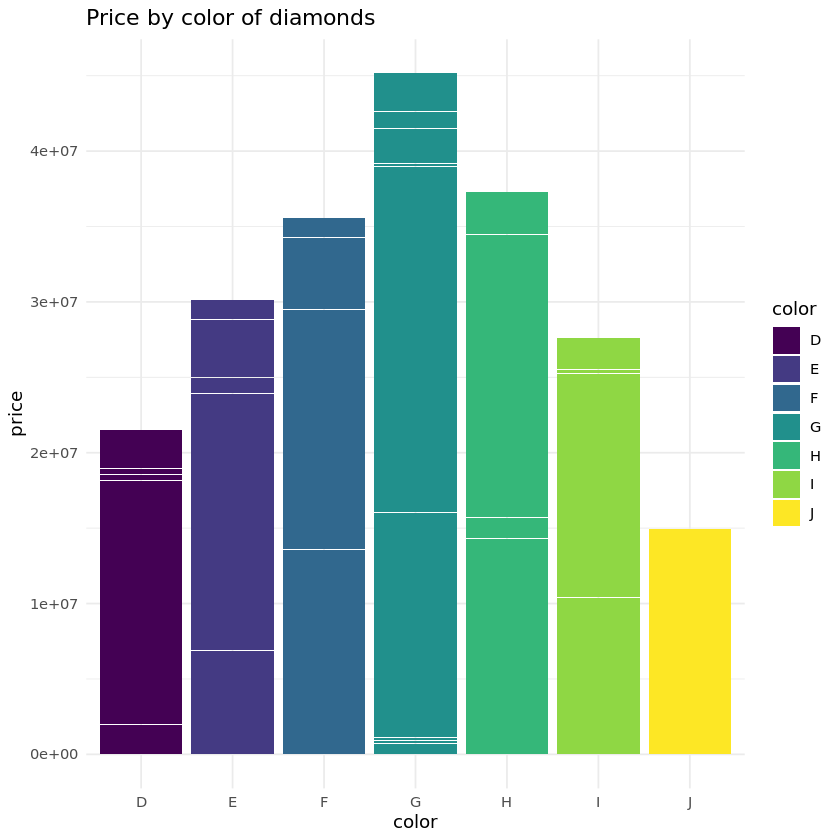

In [11]:
ggplot(diamonds,
aes(color, price, fill=color)) +
geom_col() +
theme_minimal()+
labs(title= "Price by color of diamonds")

Clearly, diamonds with the color grade G command the highest prices, while those with the grade J have the lowest.

##  The Relation of Carat and Cut

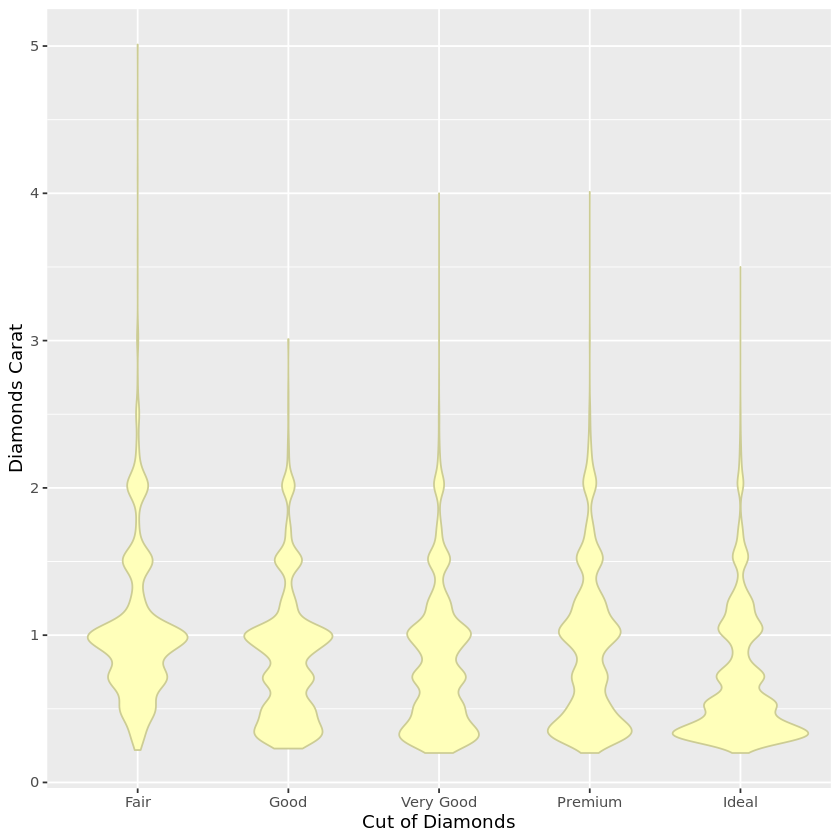

In [12]:
ggplot(diamonds, aes(cut,carat)) +
 geom_violin(fill = "#ffffba", color = "#cccc94") +
 labs(
 x = "Cut of Diamonds",
 y = "Diamonds Carat"
 ) 

For the best cut quality, consider smaller diamonds (less than 2 carats). If you prefer larger carats but still want good cut quality, opt for diamonds with Very Good to Premium cuts.